In [1]:
%load_ext autoreload
%autoreload 2
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, InputLayer
from keras.layers.convolutional import Conv2D, MaxPooling2D
import sys
import os
pwd = os.getcwd()
sys.path.append("/root/Gan/jidian/MLexperiments")
sys.path.append("/root/Gan/jidian")
sys.path.append(pwd)
sys.path.append(os.path.dirname(os.getcwd()))
import MLexperiments.classes
from MLexperiments.classes import ReadAutoLabeledData
import tensorflow as tf
import MLexperiments.config.parameters
from keras.layers import LSTM, Reshape
import matplotlib.pyplot as plt
import utils

from keras.callbacks import ModelCheckpoint
import os
from keras.callbacks import TensorBoard
from time import time
from keras.models import Model
from keras.layers import Input, Dense
import datetime
import Models
import os, errno

In [3]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3,4,5,6"

# tf.flags.DEFINE_string("TEST_MODEL_PATH","/root/Gan/jidian/MLexperiments/scripts/logs/2017-10-26 23:59:19/best_weights.hdf5"\
#                        , "Path to save the best models")
tf.flags.DEFINE_string("TEST_MODEL_PATH","/root/Gan/jidian/MLexperiments/scripts/logs/2017-10-30 06:44:03/best_weights.hdf5"\
                       , "Path to save the best models")

tf.flags.DEFINE_integer("BATCH_SIZE",128, "size")
tf.flags.DEFINE_integer("MODEL_TYPE",0 , "0: CNN, 1:RNN")
# tf.flags.DEFINE_string("CHECKPOINTPATH",'logs/{}'.format(datetime.datetime.fromtimestamp(time()).strftime('%Y-%m-%d %H:%M:%S'))\
#                       , "Path to save the best models")

In [4]:
tf.flags.DEFINE_string("MODE",  8\
                       , " mode is data source specification;   mode: 1 => 3 human + rain: 1 means high only, 2 high + mid, 3 high+mid+low ,4=>6 man + rain + wind:      4 means high only, 5 high + mid, 6 high+mid+low , 7 => qinshang + factory for testing")


FLAGS = tf.flags.FLAGS
FLAGS._parse_flags()

['-f', '/run/user/0/jupyter/kernel-6bc829c8-6f82-4538-a970-6792e00efeb5.json']

In [29]:
#setting path for load model
FLAGS.MODE = 10
FLAGS.TEST_MODEL_PATH="/root/Gan/jidian/MLexperiments/scripts/logs/2017-10-30 07:13:07/best_weights.hdf5"

In [30]:
myDataSet = utils.read_data_sets(one_hot=True, test_size = 0.9, validation_size = 0.0,mode = FLAGS.MODE)

(_, _), (_, _) , (X_test, y_test)= (myDataSet.train.images, myDataSet.train.labels), \
(myDataSet.validation.images, myDataSet.validation.labels), (myDataSet.test.images, myDataSet.test.labels)

X_test = X_test.reshape(X_test.shape[0], MLexperiments.config.parameters.SAMPLE_LEN, \
                        MLexperiments.config.parameters.SAMPLE_HEIGHT, 1).astype('float32')

#X_train /= 255
#X_test /= 255



def tran_y(y):
    y_ohe = np.zeros(MLexperiments.config.parameters.OUTPUTNUM)
    
    y_ohe[int(y)] = 1 
    return y_ohe


y_test_ohe = np.array([tran_y(y_test[i]) for i in range(len(y_test))])

loading mode = 10(np_input, labelData = wushi_man_input, wushi_man_label)
number of each type (balanced):
24913
total (balanced):
24913
 np_input shape:  (24913, 100, 10) labelData shape:  (24913,)
read succesful


In [31]:
#[][]todo to set
model = Models.getMODEL(FLAGS.MODEL_TYPE)
#model = loaded_model

In [32]:
model.load_weights(FLAGS.TEST_MODEL_PATH)
#model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])


model.summary()
#

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 98, 8, 64)         640       
_________________________________________________________________
batch_normalization_21 (Batc (None, 98, 8, 64)         256       
_________________________________________________________________
dropout_33 (Dropout)         (None, 98, 8, 64)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 96, 6, 128)        73856     
_________________________________________________________________
batch_normalization_22 (Batc (None, 96, 6, 128)        512       
_________________________________________________________________
dropout_34 (Dropout)         (None, 96, 6, 128)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 96, 6, 32)         4128      
__________

avg execution time = 
0.00018738976193520676
total execution time = 
4.201653242111206
total execution = 
22422
scores: [loss, acc]
[1.5131062511010767, 0.84882409152481875]
expected: 1.0
prediction:1


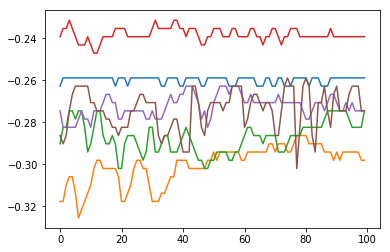

expected: 1.0
prediction:1


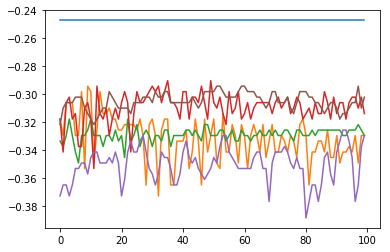

expected: 1.0
prediction:1


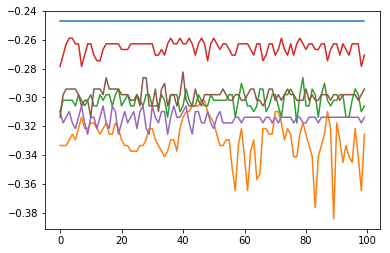

expected: 1.0
prediction:0


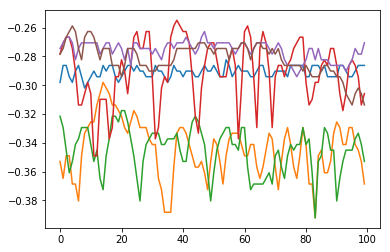

expected: 1.0
prediction:1


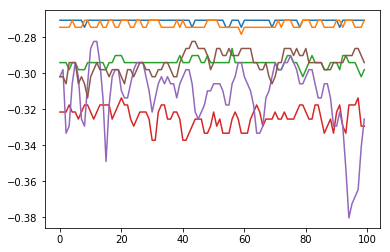

expected: 1.0
prediction:1


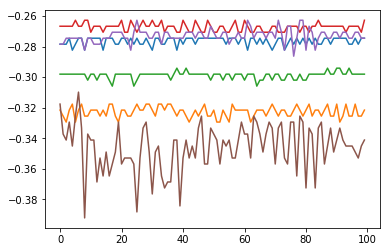

expected: 1.0
prediction:1


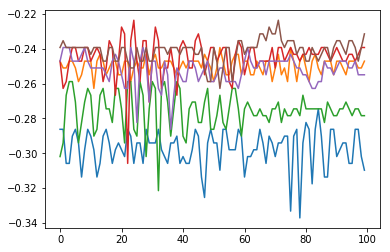

expected: 1.0
prediction:0


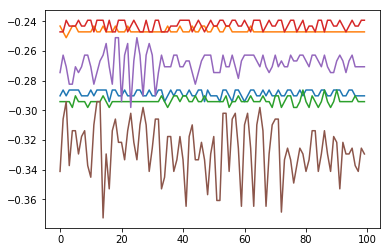

expected: 1.0
prediction:0


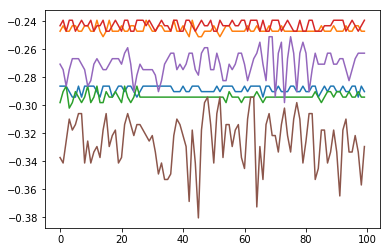

expected: 1.0
prediction:1


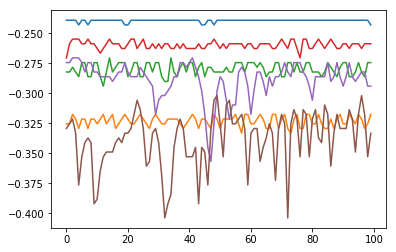

In [43]:
import time
start = time.time()
scores = model.evaluate(X_test, y_test_ohe, verbose=0)
end = time.time()
avg_time = (-start + end) / (len(y_test_ohe))
print("avg execution time = ")
print(avg_time)
print("total execution time = ")
print(-start + end)
print("total execution = ")
print((len(y_test_ohe)))
print("scores: [loss, acc]")
print(scores)
for index in range(10):
    print("expected: "+str( y_test[index]))
    prediction = model.predict(np.expand_dims(X_test[index], axis=0))[0]
    print("prediction:" + str(np.argmax(prediction,axis = 0)))
    time_series = X_test.reshape(X_test.shape[0], MLexperiments.config.parameters.SAMPLE_LEN, MLexperiments.config.parameters.SAMPLE_HEIGHT) \
        .astype('float32')[index]
    # plt.imshow( X_train.reshape(X_train.shape[0], MLexperiments.config.parameters.SAMPLE_LEN, MLexperiments.config.parameters.SAMPLE_HEIGHT).astype('float32')[0]);
    # plt.colorbar()
    # plt.show()
    plt.plot(time_series.T[0])
    plt.plot(time_series.T[1])
    plt.plot(time_series.T[2])
    plt.plot(time_series.T[3])
    plt.plot(time_series.T[4])
    plt.plot(time_series.T[5])
    plt.show()
   

In [ ]:
y_test_ohe

In [ ]:
sums = np.sum([x[1] for x in y_test_ohe])

In [ ]:
[x[1] for x in y_test_ohe]
sums

In [ ]:
len(y_test_ohe)

In [38]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
model = loaded_model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])